In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning & Pre-processing

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df.head()

,Date,Type,Gender,weather,Path
0,2019-09-20 11:42:54,formal,male,summer,dataset\formal_men_summer\Mens Summer Perfect ...
1,2020-02-19 21:35:43,beach,male,Summer,dataset\beach_men\What To Wear In Greece_ 20 O...
2,2005-12-30 12:33:02,casual,male,summer,dataset\casual_men_summer\dce0cc20-48bc-4c22-b...
3,2002-02-07 03:51:00,formal,male,winter,dataset\formal_men_winter\WhatsApp Image 2024-...
4,2008-03-20 13:20:57,casual,female,winter,dataset\casual_women_winter\Screenshot_2024010...


In [4]:
df.dtypes

Date       object
Type       object
Gender     object
weather    object
Path       object
dtype: object

In [5]:
df.isna().sum()

Date       0
Type       0
Gender     0
weather    0
Path       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     1346 non-null   object
 1   Type     1346 non-null   object
 2   Gender   1346 non-null   object
 3   weather  1346 non-null   object
 4   Path     1346 non-null   object
dtypes: object(5)
memory usage: 52.7+ KB


### Col : Weather

In [7]:
df.weather.value_counts()

weather
summer    756
winter    501
Summer     57
Winter     32
Name: count, dtype: int64

There is error in weather type of data

In [8]:
def correct_weather(x):
    if x=='winter':
        return 'Winter'
    elif x=='summer':
        return 'Summer'
    else:
        return x
    

In [9]:
df['weather']=df.weather.apply(correct_weather)

In [10]:
df.weather.value_counts()

weather
Summer    813
Winter    533
Name: count, dtype: int64

### Col: Date
- Convert `String` date to `datetime` data type.
- Form new columns of `year` and `months` 

In [12]:
df['Date']=pd.to_datetime(df.Date)

In [13]:
df.dtypes

Date       datetime64[ns]
Type               object
Gender             object
weather            object
Path               object
dtype: object

In [14]:
df['year']=df.Date.dt.year
df['month']=df.Date.dt.month
df['time']=df.Date.dt.time
df['hour']=df.Date.dt.hour

In [15]:
df.dtypes

Date       datetime64[ns]
Type               object
Gender             object
weather            object
Path               object
year                int32
month               int32
time               object
hour                int32
dtype: object

### Col : Path
- Some of images are not readable

In [16]:
def check_img(path):
    try:
        img=path
        img_array=cv2.imread(img)
        plt.imshow(img_array)
        return True
    except Exception as e:
        return False
    

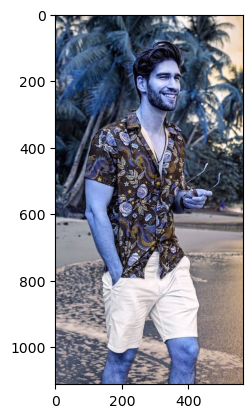

In [17]:
df['valid_images']=df.Path.apply(check_img)

In [18]:
df.valid_images.value_counts()

valid_images
True     1252
False      94
Name: count, dtype: int64

In [19]:
df1=df[df.valid_images]

In [20]:
df1.shape


(1252, 10)

In [21]:
df1.columns

Index(['Date', 'Type', 'Gender', 'weather', 'Path', 'year', 'month', 'time',
       'hour', 'valid_images'],
      dtype='object')

#  Exploratory Data Analysis

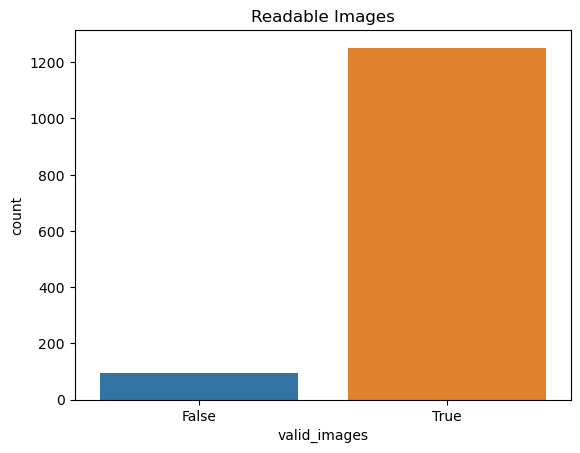

In [22]:
sns.countplot(data=df,x='valid_images')
plt.title('Readable Images')
plt.show()

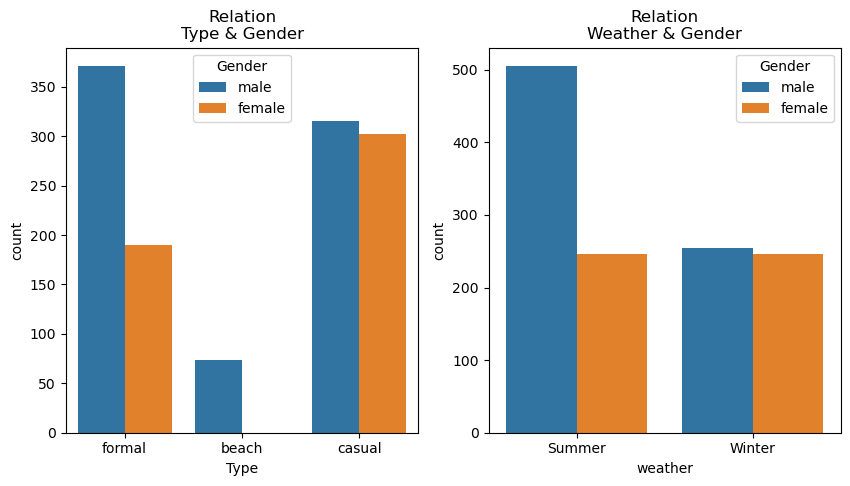

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=df1,x='Type',hue='Gender')
plt.title("Relation\nType & Gender")

plt.subplot(1,2,2)
sns.countplot(data=df1,x='weather',hue='Gender')
plt.title("Relation\nWeather & Gender")



plt.show()

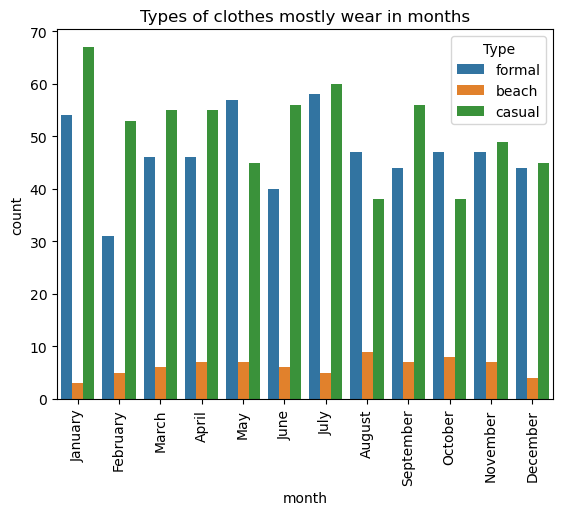

In [24]:
sns.countplot(data=df1,x='month',hue='Type');
plt.title("Types of clothes mostly wear in months")
months=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.xticks([i for i in range(12)],months,rotation=90)
plt.show()

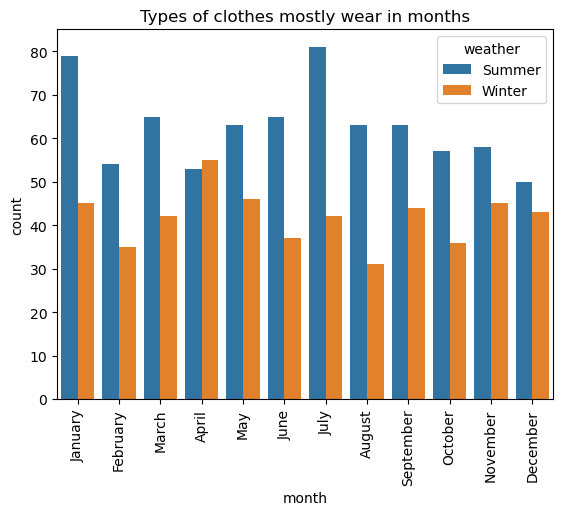

In [25]:
sns.countplot(data=df1,x='month',hue='weather');
plt.title("Types of clothes mostly wear in months")
months=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.xticks([i for i in range(12)],months,rotation=90)
plt.show()

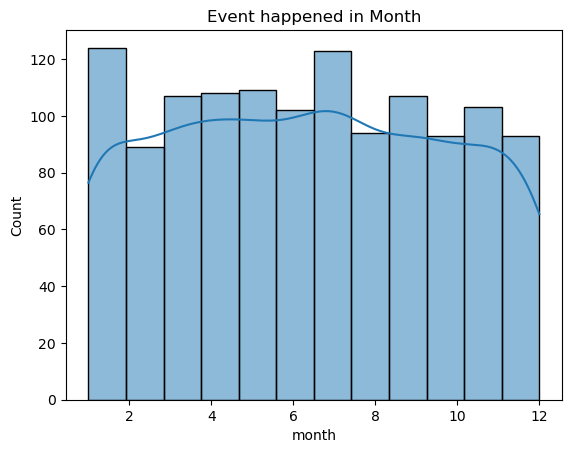

In [26]:
sns.histplot(data=df1,x='month',kde=True);
plt.title('Event happened in Month')
plt.show()

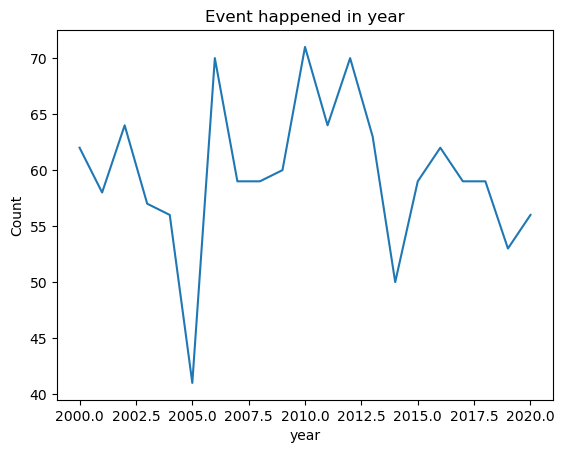

In [27]:
df1.year.value_counts().sort_index().plot()
plt.ylabel("Count")
plt.title('Event happened in year')
plt.show()

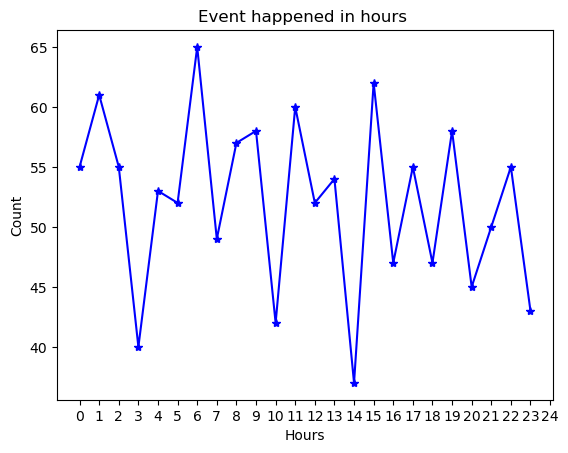

In [28]:
hour_gr=df1.groupby('hour')
hr=hour_gr.Path.count().index
hr_val=hour_gr.Path.count().values
plt.plot(hr,hr_val,'b-*')
plt.xticks(list(range(24+1)))
plt.title('Event happened in hours ')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.show()